# Loading necessary libraries

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# Meeting the data

In [15]:
train = pd.read_csv('./data/train.csv', usecols=lambda x: x !='id')
test = pd.read_csv('./data/test.csv', usecols=lambda x: x !='id')

datasets = [train, test]


In [12]:
train.head()
# train.tail()
# train.sample(5)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [13]:
train.shape

(300000, 15)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 34.3 MB


In [20]:
result_df = pd.DataFrame()

for data, name in zip(datasets,['train','test']):
    null_sum = data.isnull().sum()
    null_sum= pd.DataFrame(null_sum, columns=[name])
    result_df = pd.concat([result_df,null_sum], axis=1) 
    
result_df

,train,test
cont1,0,0.0
cont2,0,0.0
cont3,0,0.0
cont4,0,0.0
cont5,0,0.0
cont6,0,0.0
cont7,0,0.0
cont8,0,0.0
cont9,0,0.0
cont10,0,0.0


In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cont1,300000.0,0.506873,0.203976,-0.082263,0.343078,0.484005,0.643789,1.016227
cont2,300000.0,0.497898,0.228159,-0.031397,0.319170,0.553209,0.731263,0.859697
cont3,300000.0,0.521557,0.200770,0.020967,0.344096,0.551471,0.648315,1.006955
cont4,300000.0,0.515683,0.233035,0.152761,0.294935,0.482880,0.748705,1.010402
cont5,300000.0,0.502022,0.220701,0.276377,0.284108,0.451733,0.670660,1.034261
cont6,300000.0,0.526515,0.217909,0.066166,0.356163,0.470988,0.694043,1.043858
cont7,300000.0,0.487890,0.181096,-0.097666,0.346600,0.466825,0.581292,1.066167
cont8,300000.0,0.525163,0.216221,0.217260,0.341486,0.483460,0.685250,1.024427
cont9,300000.0,0.459857,0.196685,-0.240604,0.330832,0.416843,0.575041,1.004114
cont10,300000.0,0.520532,0.201854,-0.085046,0.375465,0.458877,0.700292,1.199951


In [44]:
sns.set(style="ticks")

# Create a pairplot with kde plots
g = sns.PairGrid(train)
g.map_diag(sns.kdeplot, fill=True)
g.map_offdiag(sns.kdeplot, fill=True, cmap="RdBu_r")

# Set colors based on density
for ax in g.axes.flat:
    ax.collections[0].set_alpha(0)  # Hide scatter points
    ax.collections[1].set_alpha(0.3)  # Set transparency for the density plot

# Adjust the spacing between subplots
plt.subplots_adjust(top=0.95)

<Axes: >

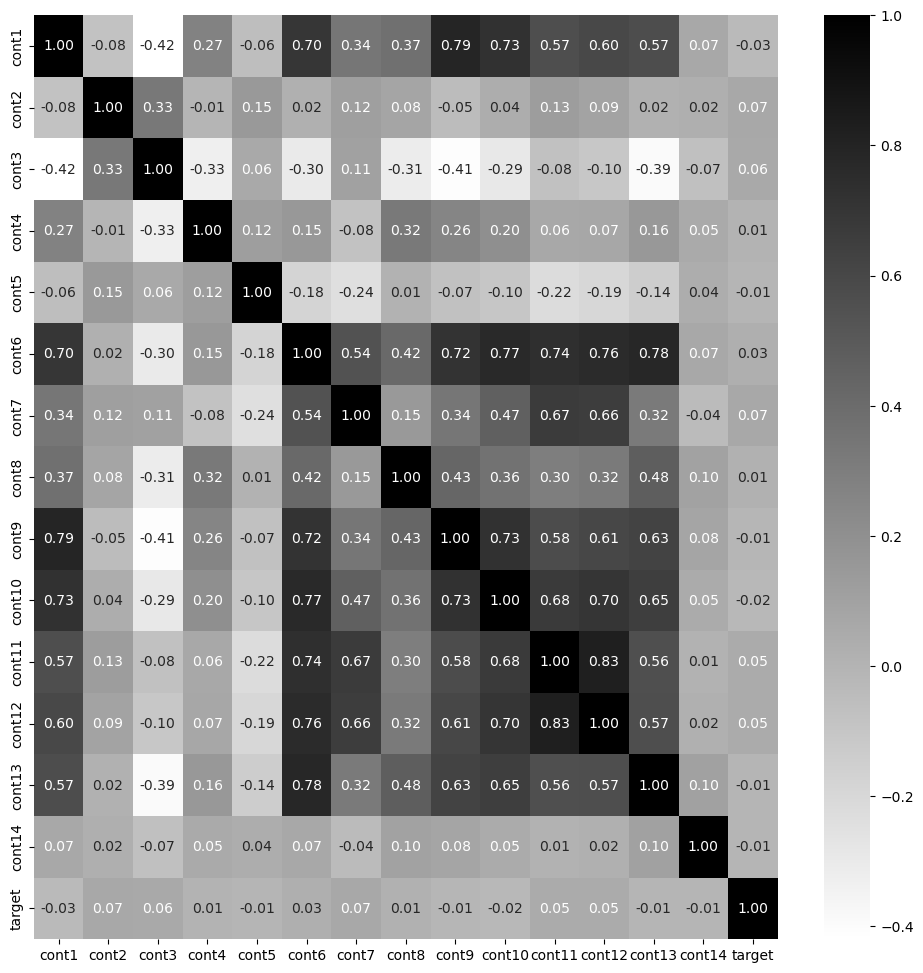

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),cmap='coolwarm',annot=True, fmt=".2f")

<Figure size 1200x1200 with 0 Axes>

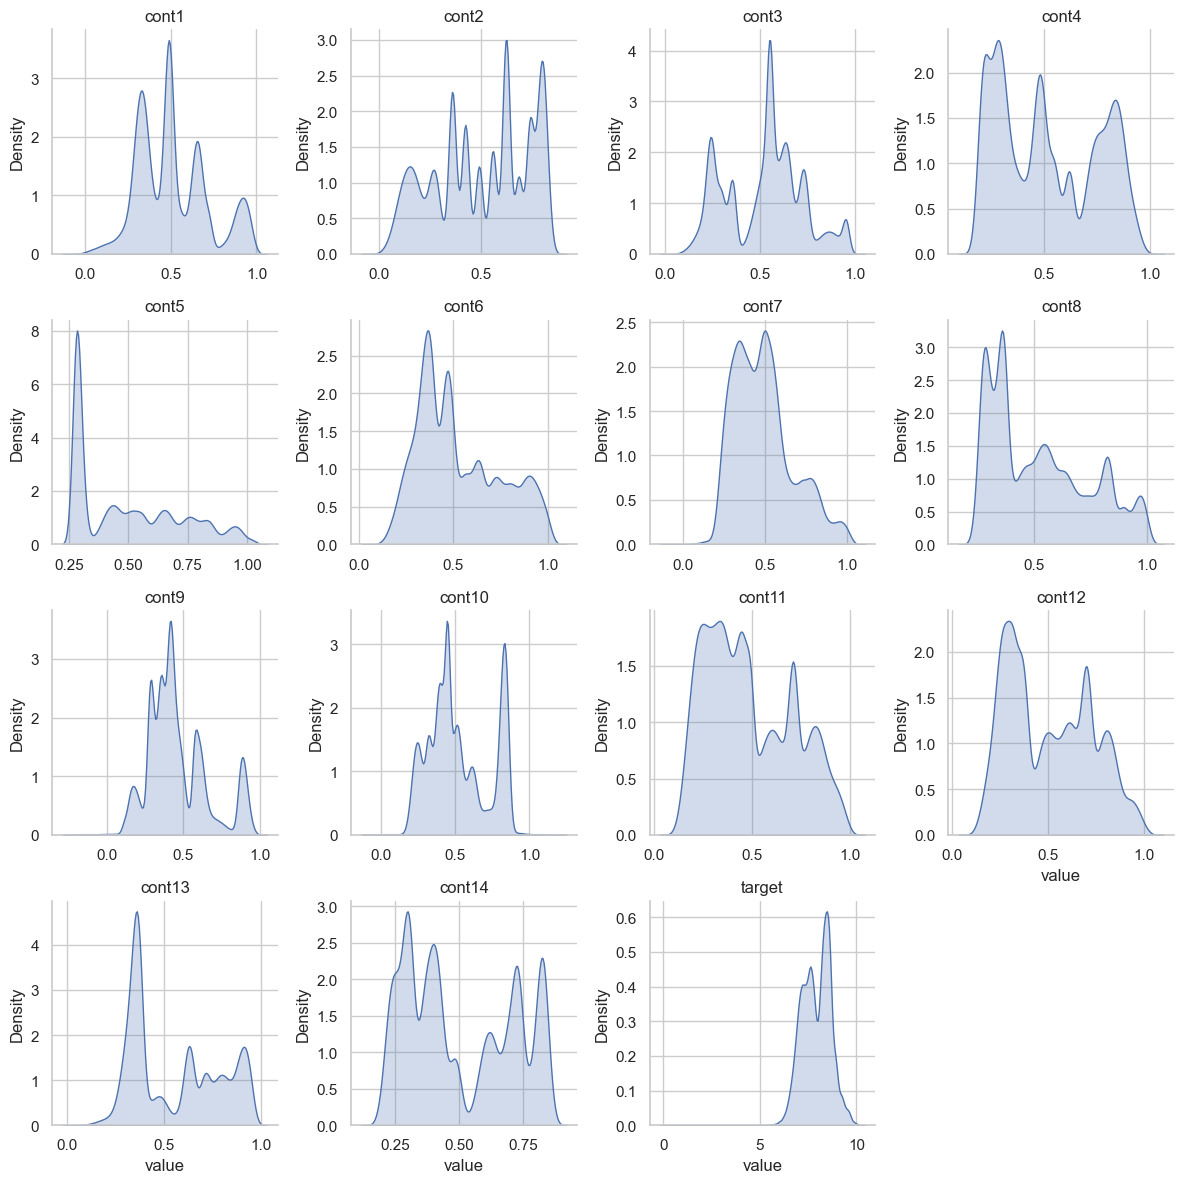

In [40]:
plt.figure(figsize=(12,12))
train_long = pd.melt(train)
g = sns.FacetGrid(train_long, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "value", fill=True)

# Set the title for each plot
for ax, title in zip(g.axes.flat, train.columns):
    ax.set_title(title)

# Adjust the spacing between the plots
plt.tight_layout()

# Display the plots
plt.show()